[*********************100%***********************]  505 of 505 completed

6 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- LUMN: No data found for this date range, symbol may be delisted
- CARR: Data doesn't exist for startDate = 1262275200, endDate = 1577808000
- BRK.B: No data found, symbol may be delisted
- VNT: Data doesn't exist for startDate = 1262275200, endDate = 1577808000
- OTIS: Data doesn't exist for startDate = 1262275200, endDate = 1577808000


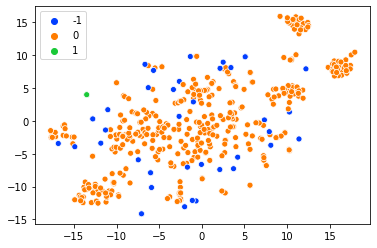

In [12]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

perplexity = 50
pca_components = 50
dbscan_samples = 3
eps = 0.5

# Get updated S&P 500 list
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
tickers = df['Symbol'].tolist()

# Get historical market data
hist = yf.download(tickers=tickers, period="1d", start='2010-01-01', end='2020-01-01')

# Drop stocks with nan values
close = hist['Adj Close'].shift(1)/hist['Adj Close']
df = close[~close.isnull().all(1)].dropna(axis='columns')
df = df.T

# To pca into 50 components
pca = PCA(n_components=pca_components)
df = pca.fit_transform(df)

# DBSCAN the dataset
dbscan = DBSCAN(eps=eps, min_samples = dbscan_samples)
clustering = dbscan.fit(df)
y = clustering.labels_

# TSNE the dataset
tsne = TSNE(perplexity=perplexity)
X_embedded = tsne.fit_transform(df)
palette = sns.color_palette("bright", len(np.unique(y)))
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette, hue=y)